# 随机梯度下降法加正则化

In [2]:
import numpy as np
import torch
from torchvision.datasets import MNIST # 导入 pytorch 内置的 mnist 数据
from torch.utils.data import DataLoader
from torch import nn
from torch.autograd import Variable
import time
import matplotlib.pyplot as plt
%matplotlib inline

def data_tf(x):
    x = np.array(x, dtype='float32') / 255 # 将数据变到 0 ~ 1 之间
    x = (x - 0.5) / 0.5 # 标准化，这个技巧之后会讲到
    x = x.reshape((-1,)) # 拉平
    x = torch.from_numpy(x)
    return x

train_set = MNIST('./data', train=True, transform=data_tf, download=True) # 载入数据集，申明定义的数据变换
test_set = MNIST('./data', train=False, transform=data_tf, download=True)

# 定义 loss 函数
criterion = nn.CrossEntropyLoss()

Processing...
Done!


随机梯度下降法，公式就是
$$
\theta_{i+1} = \theta_i - \eta \nabla L(\theta)
$$


In [3]:
def sgd_update(parameters, lr):
    for param in parameters:
        param.data = param.data - lr * param.grad.data

将 batch size 先设置为 1，看看有什么效果

In [4]:
train_data = DataLoader(train_set, batch_size=1, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 开始训练
losses1 = []
idx = 0

start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1e-2) # 使用 0.01 的学习率
        # 记录误差
        train_loss += loss.data[0]
        if idx % 30 == 0:
            losses1.append(loss.data[0])
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.345602
epoch: 1, Train Loss: 0.207654
epoch: 2, Train Loss: 0.174330
epoch: 3, Train Loss: 0.153298
epoch: 4, Train Loss: 0.147296
使用时间: 431.86288 s


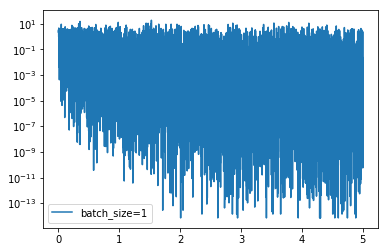

In [ ]:
x_axis = np.linspace(0, 5, len(losses1), endpoint=True)
plt.semilogy(x_axis, losses1, label='batch_size=1')
plt.legend(loc='best')

可以看到，loss 在剧烈震荡，因为每次都是只对一个样本点做计算，每一层的梯度都具有很高的随机性，而且需要耗费了大量的时间

In [3]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 开始训练
losses2 = []
idx = 0
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1e-2)
        # 记录误差
        train_loss += loss.data[0]
        if idx % 30 == 0:
            losses2.append(loss.data[0])
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.735301
epoch: 1, Train Loss: 0.362765
epoch: 2, Train Loss: 0.316051
epoch: 3, Train Loss: 0.287766
epoch: 4, Train Loss: 0.264757
使用时间: 40.03663 s


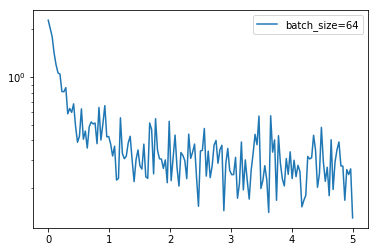

In [4]:
x_axis = np.linspace(0, 5, len(losses2), endpoint=True)
plt.semilogy(x_axis, losses2, label='batch_size=64')
plt.legend(loc='best')

通过上面的结果可以看到 loss 没有 batch 等于 1 震荡那么距离，同时也可以降到一定的程度了，时间上也比之前快了非常多，因为按照 batch 的数据量计算上更快，同时梯度对比于 batch size = 1 的情况也跟接近真实的梯度，所以 batch size 的值越大，梯度也就越稳定，而 batch size 越小，梯度具有越高的随机性，这里 batch size 为 64，可以看到 loss 仍然存在震荡，但这并没有关系，如果 batch size 太大，对于内存的需求就更高，同时也不利于网络跳出局部极小点

下面调高学习率，看看有什么样的结果

In [9]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

# 开始训练
losses3 = []
idx = 0
start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        net.zero_grad()
        loss.backward()
        sgd_update(net.parameters(), 1) # 使用 1.0 的学习率
        # 记录误差
        train_loss += loss.data[0]
        if idx % 30 == 0:
            losses3.append(loss.data[0])
        idx += 1
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 2.462500
epoch: 1, Train Loss: 2.304734
epoch: 2, Train Loss: 2.305732
epoch: 3, Train Loss: 2.304950
epoch: 4, Train Loss: 2.304857
使用时间: 42.85314 s


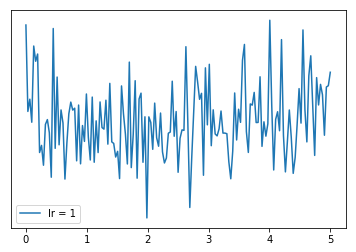

In [11]:
x_axis = np.linspace(0, 5, len(losses3), endpoint=True)
plt.semilogy(x_axis, losses3, label='lr = 1')
plt.legend(loc='best')

可以看到，学习率太大会使得损失函数不断回跳，从而无法让损失函数较好降低，所以一般都是用一个比较小的学习率

下面我们来使用 pytorch 自带的优化器来实现随机梯度下降

In [ ]:
train_data = DataLoader(train_set, batch_size=64, shuffle=True)
# 使用 Sequential 定义 3 层神经网络
net = nn.Sequential(
    nn.Linear(784, 200),
    nn.ReLU(),
    nn.Linear(200, 10),
)

optimzier = torch.optim.SGD(net.parameters(), 1e-2)
# 开始训练

start = time.time() # 记时开始
for e in range(5):
    train_loss = 0
    for im, label in train_data:
        im = Variable(im)
        label = Variable(label)
        # 前向传播
        out = net(im)
        loss = criterion(out, label)
        # 反向传播
        optimzier.zero_grad()
        loss.backward()
        optimzier.step()
        # 记录误差
        train_loss += loss.data[0]
    print('epoch: {}, Train Loss: {:.6f}'
          .format(e, train_loss / len(train_data)))
end = time.time() # 计时结束
print('使用时间: {:.5f} s'.format(end - start))

epoch: 0, Train Loss: 0.748128
epoch: 1, Train Loss: 0.365801
epoch: 2, Train Loss: 0.319804
epoch: 3, Train Loss: 0.291454


# 正则化
正则化是机器学习中提出来的一种方法，有 L1 和 L2 正则化，目前使用较多的是 L2 正则化，引入正则化相当于在 loss 函数上面加上一项，比如

$$
f = loss + \lambda \sum_{p \in params} ||p||_2^2
$$

就是在 loss 的基础上加上了参数的二范数作为一个正则化，我们在训练网络的时候，不仅要最小化 loss 函数，同时还要最小化参数的二范数，也就是说我们会对参数做一些限制，不让它变得太大。

如果我们对新的损失函数 f 求导进行梯度下降，就有

$$
\frac{\partial f}{\partial p_j} = \frac{\partial loss}{\partial p_j} + 2 \lambda p_j
$$

那么在更新参数的时候就有

$$
p_j \rightarrow p_j - \eta (\frac{\partial loss}{\partial p_j} + 2 \lambda p_j) = p_j - \eta \frac{\partial loss}{\partial p_j} - 2 \eta \lambda p_j 
$$


可以看到 $p_j - \eta \frac{\partial loss}{\partial p_j}$ 和没加正则项要更新的部分一样，而后面的 $2\eta \lambda p_j$ 就是正则项的影响，可以看到加完正则项之后会对参数做更大程度的更新，这也被称为权重衰减(weight decay)，在 pytorch 中正则项就是通过这种方式来加入的，比如想在随机梯度下降法中使用正则项，或者说权重衰减，`torch.optim.SGD(net.parameters(), lr=0.1, weight_decay=1e-4)` 就可以了，这个 `weight_decay` 系数就是上面公式中的 $\lambda$，非常方便

注意正则项的系数的大小非常重要，如果太大，会极大的抑制参数的更新，导致欠拟合，如果太小，那么正则项这个部分基本没有贡献，所以选择一个合适的权重衰减系数非常重要，这个需要根据具体的情况去尝试，初步尝试可以使用 `1e-4` 或者 `1e-3` 